In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [77]:
df = pd.read_csv('milknew.csv')

quick review:

In [53]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [54]:
df.shape

(1059, 8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [74]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [78]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

transform the categorical variable 'Grade' to the values 0-2:

In [56]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [79]:
df['Grade'] = df['Grade'].map({'high':2, 'medium':1, 'low':0})

In [58]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


check for missing values:

In [59]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

No missing values in the dataframe.

## Data exploration

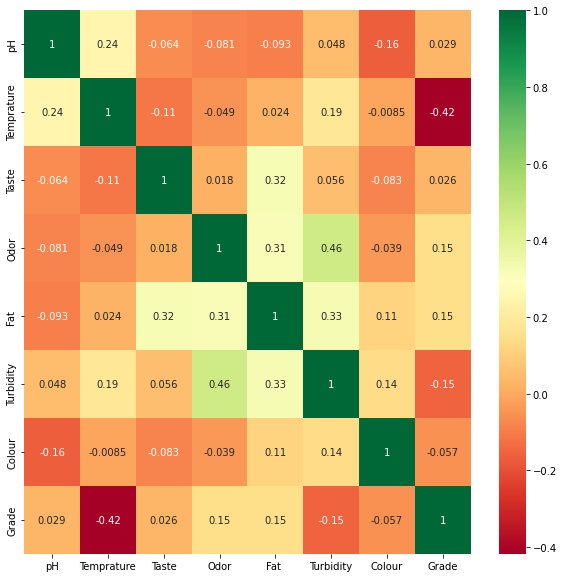

In [64]:
correllations = df.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(correllations, annot=True, cmap='RdYlGn')

array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Temprature'}>,
        <AxesSubplot:title={'center':'Taste'}>],
       [<AxesSubplot:title={'center':'Odor'}>,
        <AxesSubplot:title={'center':'Fat '}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Colour'}>,
        <AxesSubplot:title={'center':'Grade'}>, <AxesSubplot:>]],
      dtype=object)

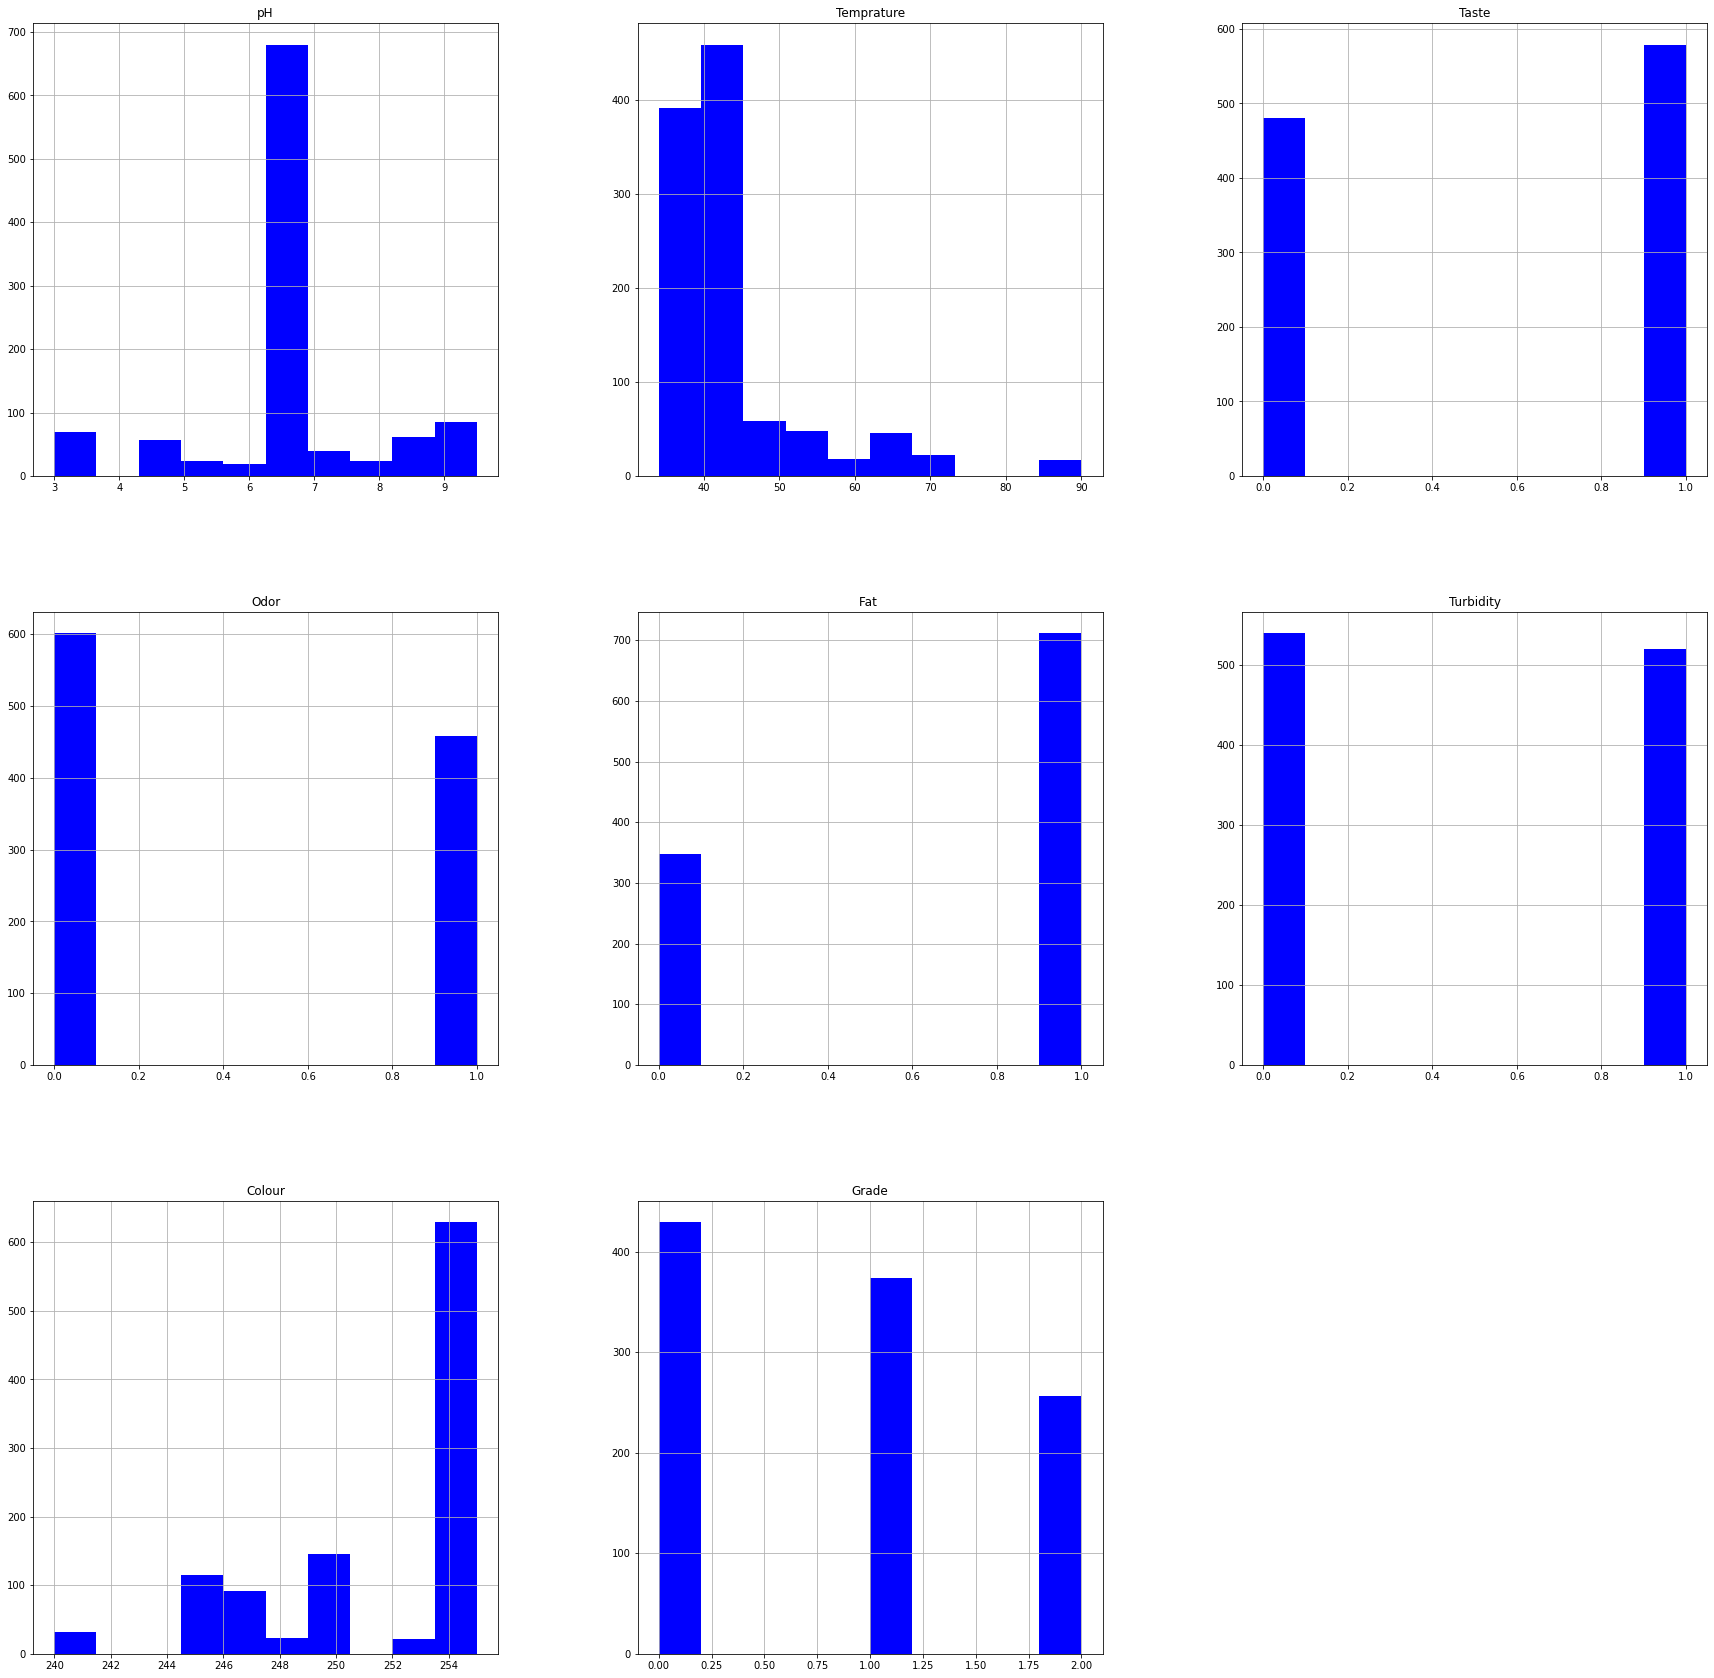

In [75]:
df.hist(bins = 10, figsize = (30,30), color='blue')

<AxesSubplot:xlabel='Grade', ylabel='count'>

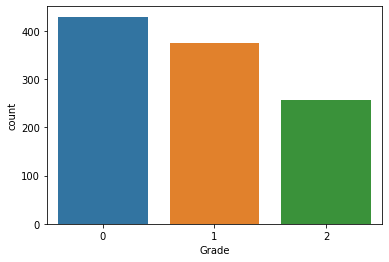

In [80]:
sns.countplot(data=df, x='Grade')

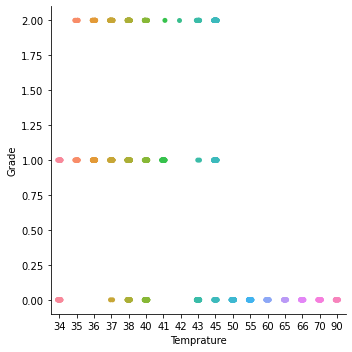

In [84]:
g = sns.catplot(data=df, x='Temprature', y='Grade', kind='strip')

<AxesSubplot:xlabel='Temprature', ylabel='pH'>

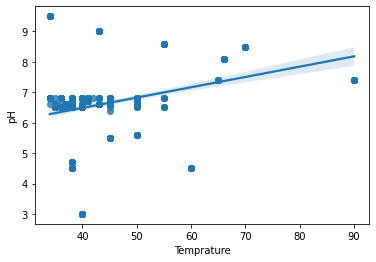

In [126]:
sns.regplot(data=df, x="Temprature", y="pH")

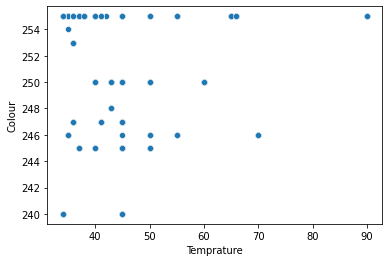

In [97]:
sns.scatterplot(x="Temprature", y="Colour", data=df);

In [94]:
df.rename(columns={'Fat ':'Fat'}, inplace=True)

## Logistic Regression

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
def create_dataset(X_data, y_data):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_dataset(X, y)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

acc_vec = []
c_vec = np.arange(0.1,10,0.1)

for i in c_vec:
    model = LogisticRegression(C=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_vec.append(accuracy_score(y_test, y_pred))

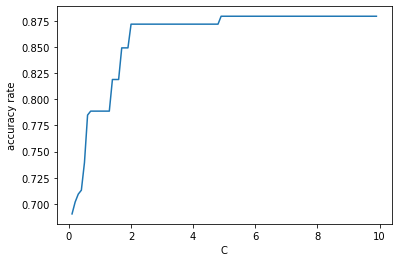

In [121]:
fig, axs = plt.subplots()
axs.set_xlabel('C')
axs.set_ylabel('accuracy rate')

axs.plot(c_vec, acc_vec)

best we can get with Logistic Regression is 0.875.

In [111]:
model.coef_ # 3 vectors since we have 3 classes

array([[-2.40993905, 13.56315147,  1.58176044, -0.07676709, -2.07832102,
         1.85511479,  2.89275648],
       [ 0.2902612 , -9.1631423 , -2.2407236 , -2.25073188, -3.81930064,
        -1.93576719, -5.14213438],
       [ 2.11967785, -4.40000917,  0.65896316,  2.32749897,  5.89762166,
         0.08065241,  2.2493779 ]])

## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

acc_vec_RF = []
depth_vec = np.arange(1, 20, 1)

for d in depth_vec:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    y_pred_RF = clf.predict(X_test)
    acc_vec_RF.append(accuracy_score(y_test, y_pred_RF))

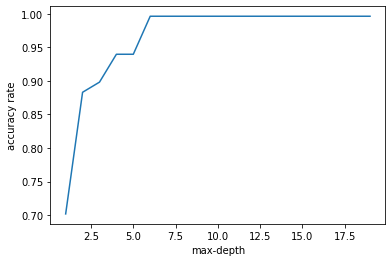

In [123]:
fig, axs = plt.subplots()
axs.set_xlabel('max-depth')
axs.set_ylabel('accuracy rate')

axs.plot(depth_vec, acc_vec_RF)

In [125]:
max(acc_vec_RF)

0.9962264150943396

Random Forest works very well here.